In [1]:
#Import of used Packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
p4 = pd.read_csv("../UE_Motion_Capture/data_export/walking_music_P5_pos.tsv",delimiter="\t",usecols=["RHeel_pos_Z","LHeel_pos_Z"])

{'whiskers': [<matplotlib.lines.Line2D at 0x269cfd18210>,
 'caps': [<matplotlib.lines.Line2D at 0x269cfd19dd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x269cfd0b410>],
 'medians': [<matplotlib.lines.Line2D at 0x269cfd1b5d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x269cfd24150>],
 'means': []}

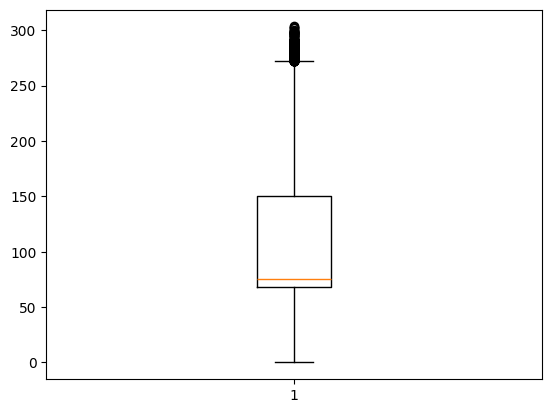

In [3]:
plt.boxplot(p4["RHeel_pos_Z"])

In [106]:
#Calculation of right foot steps
Rsteps = []
frame = 0
bValley = False
for index, values in p4.iterrows():
    RValue = values["RHeel_pos_Z"]
    if frame < 150:
        frame += 1
        continue
    if RValue < 80:
        bValley = False
        for i in range(1,50):
            before = p4.loc[frame-i,"RHeel_pos_Z"]
            next = p4.loc[frame+i,"RHeel_pos_Z"]
            if (RValue <= before) and (RValue <= next):
                bValley = True
            else:
                bValley = False
                break
        if bValley:
            print("R - ", frame, ": ", RValue)
            Rsteps.append([frame,RValue])
    frame += 1

R -  183 :  70.369
R -  262 :  54.552
R -  368 :  56.935
R -  475 :  53.969
R -  582 :  52.884
R -  688 :  56.54
R -  797 :  61.769
R -  904 :  62.119
R -  1011 :  60.716
R -  1121 :  61.78
R -  1228 :  53.773
R -  1337 :  55.182
R -  1446 :  54.361
R -  1553 :  53.703
R -  1662 :  54.5
R -  1768 :  59.197
R -  1878 :  63.709
R -  1989 :  61.18
R -  2097 :  61.171
R -  2208 :  58.848
R -  2317 :  53.769
R -  2425 :  56.995
R -  2534 :  54.656
R -  2643 :  55.645
R -  2750 :  62.664
R -  2862 :  58.623
R -  2996 :  61.902
R -  3132 :  62.24
R -  3267 :  57.28
R -  3405 :  65.111
R -  3538 :  57.685
R -  3670 :  56.726
R -  3805 :  55.075
R -  3940 :  57.37
R -  4073 :  55.373
R -  4207 :  59.429
R -  4346 :  57.499
R -  4484 :  61.312
R -  4618 :  66.831
R -  4738 :  63.044
R -  4851 :  61.502
R -  4964 :  60.915
R -  5077 :  55.687
R -  5187 :  60.293
R -  5305 :  63.825
R -  5356 :  63.751
R -  5436 :  60.282
R -  5509 :  61.093
R -  5656 :  68.359
R -  5731 :  71.149
R -  5822 :  74.

KeyError: 9692

In [107]:
#Calculation of left foot steps
LSteps = []
frame = 0
for index, values in p4.iterrows():
    LValue = values["LHeel_pos_Z"]
    if frame < 150:
        frame += 1
        continue
    if LValue < 80:
        for i in range(1,50):
            before = p4.loc[frame-i,"LHeel_pos_Z"]
            next = p4.loc[frame+i,"LHeel_pos_Z"]
            if (LValue <= before) and (LValue <= next):
                bValley = True
            else:
                bValley = False
                break
        if bValley:
            print("L - ", frame, ": ", LValue)
            LSteps.append([frame,LValue])
    frame += 1

L -  206 :  53.995
L -  317 :  48.34
L -  423 :  49.901
L -  530 :  46.773
L -  635 :  51.298
L -  743 :  56.062
L -  850 :  56.996
L -  959 :  57.094
L -  1068 :  54.764
L -  1177 :  51.737
L -  1285 :  46.305
L -  1393 :  49.421
L -  1501 :  46.329
L -  1609 :  45.894
L -  1718 :  54.425
L -  1824 :  55.762
L -  1934 :  58.329
L -  2044 :  57.625
L -  2154 :  55.004
L -  2264 :  51.1
L -  2371 :  46.657
L -  2481 :  49.323
L -  2589 :  46.716
L -  2701 :  51.616
L -  2805 :  57.558
L -  2927 :  57.152
L -  3064 :  59.843
L -  3202 :  58.215
L -  3338 :  54.945
L -  3473 :  53.814
L -  3606 :  50.109
L -  3738 :  48.42
L -  3876 :  49.522
L -  4011 :  49.919
L -  4143 :  50.24
L -  4279 :  53.418
L -  4418 :  56.663
L -  4551 :  58.997
L -  4682 :  62.14
L -  4796 :  56.624
L -  4909 :  56.461
L -  5022 :  52.51
L -  5131 :  47.458
L -  5241 :  52.459
L -  5332 :  60.642
L -  5394 :  58.63
L -  5469 :  53.321
L -  5542 :  56.892
L -  5618 :  63.645
L -  5693 :  63.366
L -  5767 :  63.

In [108]:
#Combination of steps
steps = LSteps + Rsteps
steps.sort()

In [109]:
steps = pd.DataFrame(steps)
steps

,0,1
0,183,70.369
1,206,53.995
2,262,54.552
3,317,48.340
4,368,56.935
...,...,...
170,9344,57.812
171,9403,64.541
172,9470,56.751
173,9533,57.102


In [113]:
m1 = pd.read_csv("../UE_Motion_Capture/music/export_big_john.txt",delimiter="\t", header=None)
m2 = pd.read_csv("../UE_Motion_Capture/music/export_berlioz.txt",delimiter="\t", header=None)
m3 = pd.read_csv("../UE_Motion_Capture/music/export_wombats.txt",delimiter="\t", header=None)

In [114]:
#delete first row
m1 = m1.drop(index=0)
m2 = m2.drop(index=0)
m3 = m3.drop(index=0)

In [115]:
start_music = pd.read_csv("../UE_Motion_Capture/start_of_music.csv",delimiter="\t", header=None)

In [116]:
start_music[start_music[0]=='P5_M2'][1].item()

5160.0

In [117]:
#Update TIme Values, to frames, to starting_time 
m1[0] = (m1[0]*100)+start_music[start_music[0]=='P5_M1'][1].item()
m2[0] = (m2[0]*100)+start_music[start_music[0]=='P5_M2'][1].item()
m3[0] = (m3[0]*100)+start_music[start_music[0]=='P5_M3'][1].item()

In [118]:
m2

,0,1
1,5345.179138,80.7495BPM
2,5419.482993,80.7495BPM
3,5493.786848,80.7495BPM
4,5568.090703,80.7495BPM
5,5644.716553,78.3026BPM
6,5720.181406,79.5072BPM
7,5795.646258,79.5072BPM
8,5871.111111,79.5072BPM
9,5944.253968,82.0313BPM
10,6018.557823,80.7495BPM


(0.0, 9800.0)

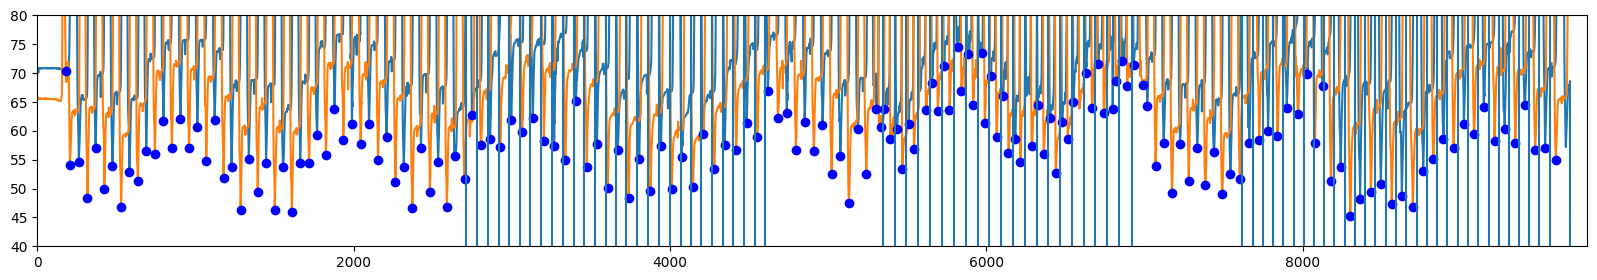

In [119]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m1[0],0,500)
plt.vlines(m2[0],0,500)
plt.vlines(m3[0],0,500)
plt.ylim([40, 80])
plt.xlim([0, 9800])

In [120]:
start = m1[0].min()
end = m1[0].max()

steps.loc[(steps[0] >= start) & (steps[0] <= end)].count()[0]/(((end-start)/100)/60)

88.82941988586032

In [121]:
#ersten 5 Sekunden
start = m1[0].min()
end = m1[0].min()+500

steps.loc[(steps[0] >= start) & (steps[0] <= end)].count()[0]/(((end-start)/100)/60)

96.0

# P7 - M1

In [122]:
m1_start = m1[0].min()
m1_end = m1[0].max()
print(m1_start)
print(m1_end)

2710.3492063
4601.6145125


In [123]:
beats_in_m1_range = m1[(m1[0]>=m1_start) & (m1[0]<=m1_end)][0] 
steps_in_m1_range = steps.loc[(steps[0] >= m1_start) & (steps[0] <= m1_end)][0]

In [124]:
steps_in_m1_range.count()

28

In [125]:
beats_in_m1_range.count()

29

In [126]:
(29/20)*60

87.0

In [127]:
(34/20)*60

102.0

In [128]:
beats_in_m1_range

1     2710.349206
2     2778.848073
3     2847.346939
4     2915.845805
5     2982.022676
6     3049.360544
7     3116.698413
8     3186.358277
9     3254.857143
10    3323.356009
11    3391.854875
12    3458.031746
13    3525.369614
14    3592.707483
15    3657.723356
16    3722.739229
17    3791.238095
18    3860.897959
19    3929.396825
20    3997.895692
21    4066.394558
22    4132.571429
23    4197.587302
24    4263.764172
25    4332.263038
26    4399.600907
27    4466.938775
28    4534.276644
29    4601.614513
Name: 0, dtype: float64

In [129]:
#all MUSIC M1
beats_in_m1_range.count()/((beats_in_m1_range.max()-beats_in_m1_range.min())/100)*60

92.00189916749818

In [130]:
steps_in_m1_range.count()

28

In [131]:
steps_in_m1_range.max()-steps_in_m1_range.min()

1801

In [132]:
#all WALKING M1
steps_in_m1_range.count()/((steps_in_m1_range.max()-steps_in_m1_range.min())/100)*60

93.28151027207107

In [133]:
after3W = steps_in_m1_range[steps_in_m1_range >= steps_in_m1_range.min()+300]

In [134]:
after3M = beats_in_m1_range[beats_in_m1_range >= beats_in_m1_range.min()+300]

In [135]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100)*60

92.80430396772024

In [136]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100)*60

92.7683246045788

In [137]:
from statistics import mean
mean(abs(x - y) for x, y in zip(beats_in_m1_range, steps_in_m1_range))

14.98947198571435

In [139]:
from sklearn.metrics import mean_squared_error 
  
# Calculation of Mean Squared Error (MSE) 
mean_squared_error(beats_in_m1_range,steps_in_m1_range) 

ValueError: Found input variables with inconsistent numbers of samples: [29, 28]

(2690.3492063, 4621.6145125)

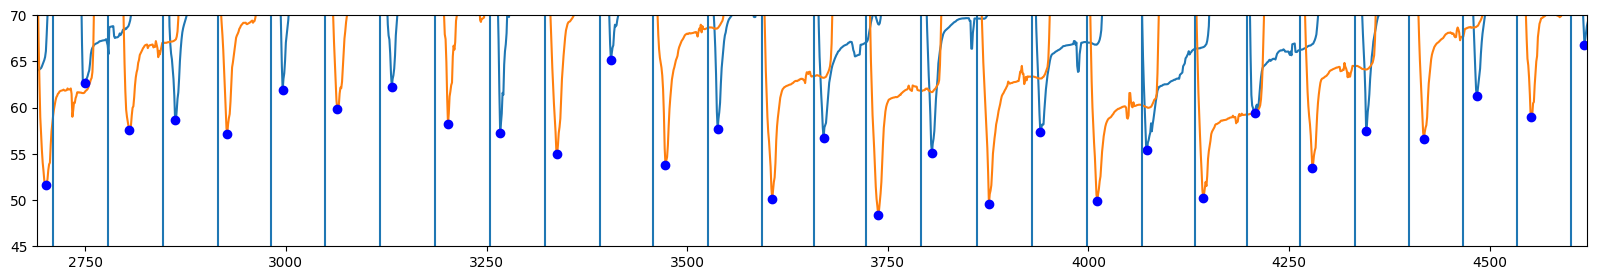

In [140]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m1[0],0,500)
plt.ylim([45, 70])
plt.xlim([m1_start-20, m1_end+20])

# P5 - M2

In [141]:
m2_start = m2[0].min()
m2_end = m2[0].max()
print(m2_start)
print(m2_end)

5345.1791383
6918.3310658


In [142]:
beats_in_m2_range = m2[(m2[0]>=m2_start) & (m2[0]<=m2_end)][0] 
steps_in_m2_range = steps.loc[(steps[0] >= m2_start) & (steps[0] <= m2_end)][0]

In [143]:
#all MUSIC M1
beats_in_m2_range.count()/((beats_in_m2_range.max()-beats_in_m2_range.min())/100/60)

83.90797970147102

In [144]:
#all WALKING M1
steps_in_m2_range.count()/((steps_in_m2_range.max()-steps_in_m2_range.min())/100/60)

152.44299674267103

In [145]:
after3W = steps_in_m2_range[steps_in_m2_range >= steps_in_m2_range.min()+300]

In [146]:
after3M = beats_in_m2_range[beats_in_m2_range >= beats_in_m2_range.min()+300]

In [147]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100/60)

155.4655870445344

In [148]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100/60)

85.1312681660429

(5325.1791383, 6938.3310658)

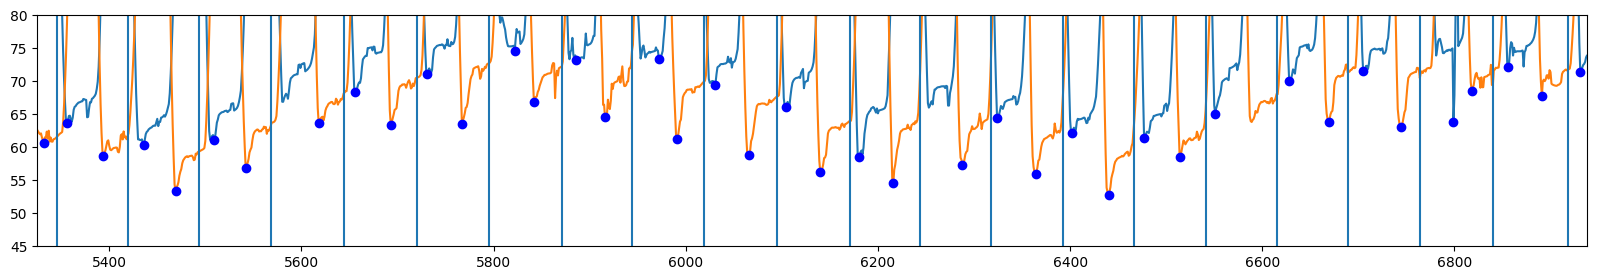

In [149]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
plt.vlines(m2[0],0,500)
plt.ylim([45, 80])
plt.xlim([m2_start-20, m2_end+20])

# P7 - M3

In [150]:
m3_start = m3[0].min()
m3_end = m3[0].max()
print(m3_start)
print(m3_end)

7618.4761905
9561.9863946


In [151]:
beats_in_m3_range = m3[(m3[0]>=m3_start) & (m3[0]<=m3_end)][0] 
steps_in_m3_range = steps.loc[(steps[0] >= m3_start) & (steps[0] <= m3_end)][0]

In [152]:
#all MUSIC M1
beats_in_m3_range.count()/((beats_in_m3_range.max()-beats_in_m3_range.min())/100/60)

95.70312499909551

In [153]:
#all WALKING M1
steps_in_m3_range.count()/((steps_in_m3_range.max()-steps_in_m3_range.min())/100/60)

99.41207910208445

In [154]:
after3W = steps_in_m3_range[steps_in_m3_range >= steps_in_m3_range.min()+300]

In [155]:
after3M = beats_in_m3_range[beats_in_m3_range >= beats_in_m3_range.min()+300]

In [156]:
#after3 WALKING
after3W.count()/((after3W.max()-after3W.min())/100/60)

99.87195902688862

In [157]:
#after3 music
after3M.count()/((after3M.max()-after3M.min())/100/60)

96.38966104748079

(7598.4761905, 9581.9863946)

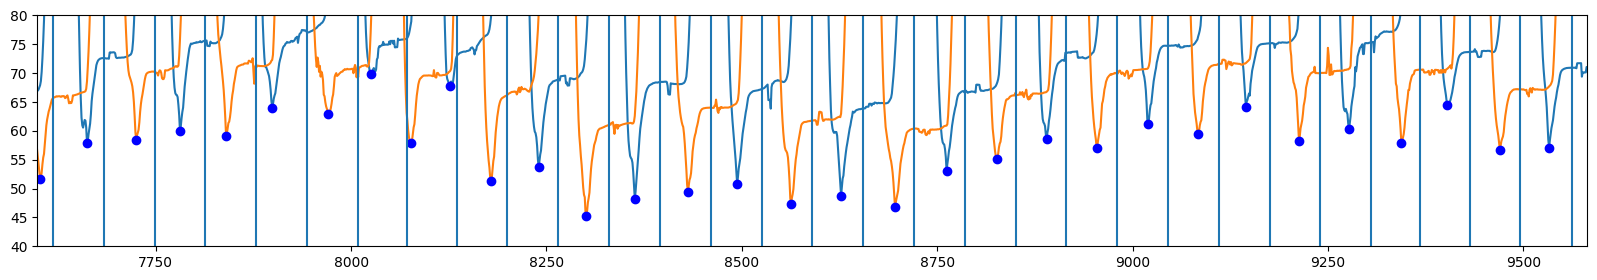

In [160]:
plt.figure(figsize=(20,3))
plt.plot(p4)
plt.plot(steps[0],steps[1],'bo')
#plt.plot(m1[0],m1[3],'x')
plt.vlines(m3[0],0,500)
plt.ylim([40, 80])
plt.xlim([m3_start-20, m3_end+20])